In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df=pd.read_csv('improved_disease_dataset.csv')

In [81]:
df.head(50)

,fever,headache,nausea,vomiting,fatigue,joint_pain,skin_rash,cough,weight_loss,yellow_eyes,disease
0,1,0,1,0,1,0,0,1,1,0,Paralysis (brain hemorrhage)
1,0,0,1,0,0,0,1,1,0,0,Paralysis (brain hemorrhage)
2,0,0,1,0,1,0,1,1,0,0,Paralysis (brain hemorrhage)
3,0,0,1,1,1,0,1,1,1,1,Paralysis (brain hemorrhage)
4,1,0,1,0,1,0,0,0,1,1,Paralysis (brain hemorrhage)
5,0,0,1,0,1,0,0,0,0,0,Paralysis (brain hemorrhage)
6,0,1,1,1,0,0,0,1,0,0,Paralysis (brain hemorrhage)
7,0,1,1,0,1,0,0,0,1,0,Paralysis (brain hemorrhage)
8,0,0,1,1,1,0,0,1,0,0,Paralysis (brain hemorrhage)
9,1,0,0,1,0,0,0,1,1,0,Paralysis (brain hemorrhage)


In [82]:
df.shape

(2000, 11)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   fever        2000 non-null   int64 
 1   headache     2000 non-null   int64 
 2   nausea       2000 non-null   int64 
 3   vomiting     2000 non-null   int64 
 4   fatigue      2000 non-null   int64 
 5   joint_pain   2000 non-null   int64 
 6   skin_rash    2000 non-null   int64 
 7   cough        2000 non-null   int64 
 8   weight_loss  2000 non-null   int64 
 9   yellow_eyes  2000 non-null   int64 
 10  disease      2000 non-null   object
dtypes: int64(10), object(1)
memory usage: 172.0+ KB


In [84]:
df['disease'].value_counts()

disease
Paralysis (brain hemorrhage)                      90
Hypertension                                      80
Hepatitis B                                       80
Impetigo                                          80
Chronic cholestasis                               70
Hepatitis C                                       70
Typhoid                                           70
Dimorphic hemorrhoids(piles)                      70
Vertigo (Benign paroxysmal Positional Vertigo)    70
Cervical spondylosis                              70
Tuberculosis                                      70
Hyperthyroidism                                   70
Malaria                                           60
Gastroenteritis                                   60
Osteoarthritis                                    60
Heart attack                                      60
Dengue                                            50
Pneumonia                                         50
Urinary tract infection               

In [85]:
df.isnull().sum()

fever          0
headache       0
nausea         0
vomiting       0
fatigue        0
joint_pain     0
skin_rash      0
cough          0
weight_loss    0
yellow_eyes    0
disease        0
dtype: int64

In [86]:
df.duplicated().value_counts()

False    1432
True      568
Name: count, dtype: int64

In [87]:
df.duplicated().sum()

np.int64(568)

In [88]:
df=df.drop_duplicates()

In [89]:
df.duplicated().sum()

np.int64(0)

In [90]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [91]:
df['disease']=le.fit_transform(df['disease'])

In [92]:
X=df.drop('disease',axis=1)
y=df['disease']

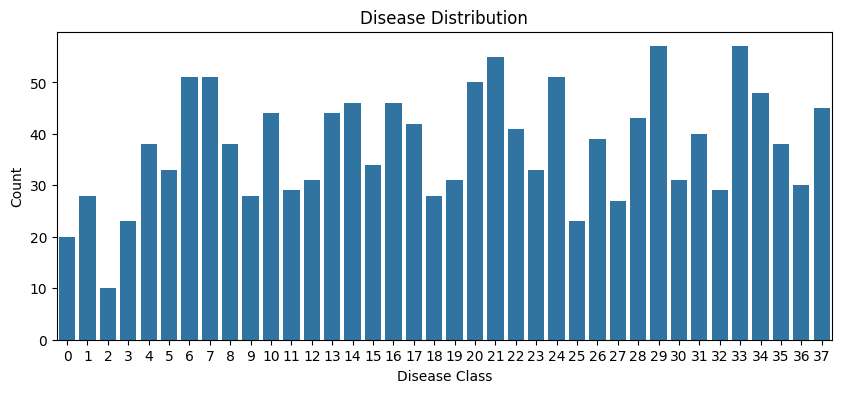

In [93]:
# 5. Visualizations: Class distribution
plt.figure(figsize=(10, 4))
sns.countplot(x=y)
plt.title("Disease Distribution")
plt.xlabel("Disease Class")
plt.ylabel("Count")
plt.show()

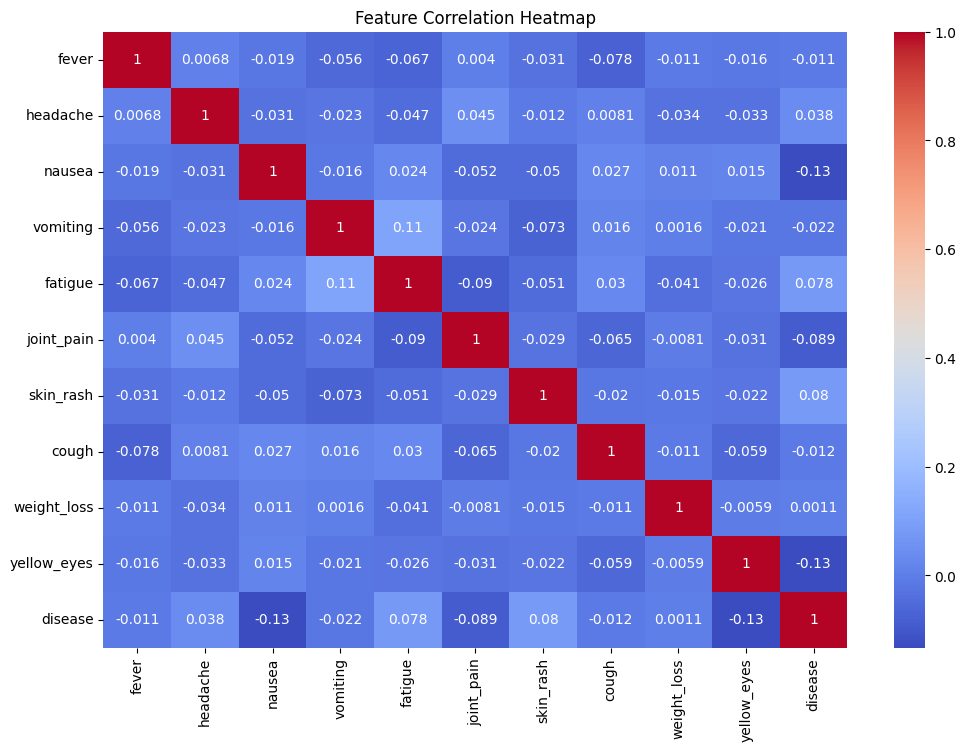

In [94]:
# 6. Correlation heatmap
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [96]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [97]:

models = {
    "SVC": SVC(),
    "GaussianNB": GaussianNB(),
    'Random Forest':RandomForestClassifier(n_estimators=100,random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Model: {name}")
    print("Accuracy:", acc)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 60)


Model: SVC
Accuracy: 0.23693379790940766
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         4
           3       0.50      0.20      0.29         5
           4       0.10      0.17      0.12         6
           5       0.50      0.38      0.43         8
           6       0.12      0.20      0.15        10
           7       0.33      0.25      0.29        12
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         8
          10       0.25      0.08      0.12        13
          11       0.40      0.33      0.36         6
          12       0.00      0.00      0.00        11
          13       0.12      0.12      0.12         8
          14       0.30      0.38      0.33         8
          15       0.12      0.25      0.17         4
          16     

c:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: Unde

Model: Random Forest
Accuracy: 0.0975609756097561
Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.17      0.18         6
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         8
           6       0.09      0.10      0.10        10
           7       0.11      0.08      0.10        12
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00        13
          11       0.17      0.17      0.17         6
          12       0.00      0.00      0.00        11
          13       0.00      0.00      0.00         8
          14       0.08      0.12      0.10         8
          15       0.00      0.00      0.00         4
        

c:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


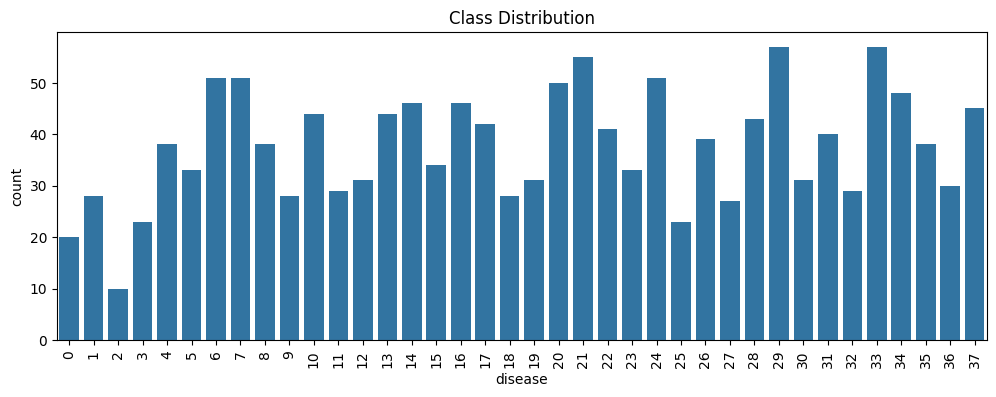

In [99]:
plt.figure(figsize=(12, 4))
sns.countplot(x=y)
plt.title("Class Distribution")
plt.xticks(rotation=90)
plt.show()


In [100]:
print(f'model:{name}')
print('Accuracy:',acc)
print('Classification Report:',classification_report(y_test,y_pred))
print('-'*60)

model:Random Forest
Accuracy: 0.0975609756097561
Classification Report:               precision    recall  f1-score   support

           0       0.20      0.17      0.18         6
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         8
           6       0.09      0.10      0.10        10
           7       0.11      0.08      0.10        12
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00        13
          11       0.17      0.17      0.17         6
          12       0.00      0.00      0.00        11
          13       0.00      0.00      0.00         8
          14       0.08      0.12      0.10         8
          15       0.00      0.00      0.00         4
         

c:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
